<a href="https://colab.research.google.com/github/pumkinni/book_study/blob/master/%ED%98%BC%EA%B3%B5_%EB%A8%B8_%EB%94%A5_6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석
> 차원 축소에 대해 이해하고 대표적인 차원 축소 알고리즘 중 하나인 PCA(주성분 분석) 모델을 만들어 보기

#### 차원과 차원축소
- 차원 = 특성 : 데이터가 가진 속성( 앞에서 배운 과일 사진의 경우 10000개의 차원)
- 차원 축소 : 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도학습 모델의 성능을 향상시킬 수 있는 방법
- 주성분 분석(PCA) : 대표적인 차원 축소 알고리즘

#### 주성분 분석
- 데이터에 있는 분산이 큰 방향(데이터로 잘 표현하는 벡터 : **주성분**)을 찾는 것
- 분산 : 데이터가 널리 퍼져있는 정도
- 두번째 주성분 : 첫번째 주성분을 찾은 다음 이 벡터에 수직이고 분산이 가장 큰 다음 방향
- 기술적인 이유로 주성분은 원본 특성의 개수와 샘플 개수 중 작은 값만큼 찾을 수 있음(일반적으로 비지도 학습은 대량의 데이터에서 수행하기 때문에 원본 특성의 개수만큼 찾을 수 있다고 말함)


PCA 클래스

In [ ]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2022-05-12 00:19:32--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2022-05-12 00:19:32--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2022-05-12 00:19:32--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50) # n_components = "주성분의 개수"
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
# 주성분은 components_속성에 저장 (50개의 주성분, 원본 데이터 특성의 개수 = 10000)
pca.components_.shape

(50, 10000)

In [ ]:
# 각클러스터가 어떤 이미지를 나타냈는지 그림으로 출력하는 함수
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr) # 샘플 개수
  rows = int(np.ceil(n/10)) # 한 줄에 10개의 이미지를 그림
  # 행이 1개이면 열의 개수는 샘플 개수입니다. 그렇지 않으면 10개 입니다.
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (rows * ratio, cols * ratio), squeeze = False)

  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n :
        axs[i, j].imshow(arr[i * 10 + j], cmap = 'gray_r')
      axs[i, j].axis("off")
  plt.show()

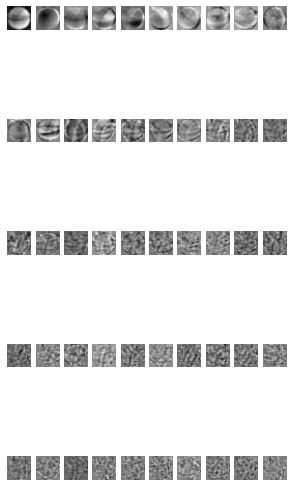

In [ ]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
# 50개의 주성분을 찾은 PCA 모델을 사용해 (300,10000) => (300, 50) 크기의 배열로 변환
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

원본 데이터 재구성

In [ ]:
# inverse_transform() 매서드를 사용해 10000개의 특성 복원
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


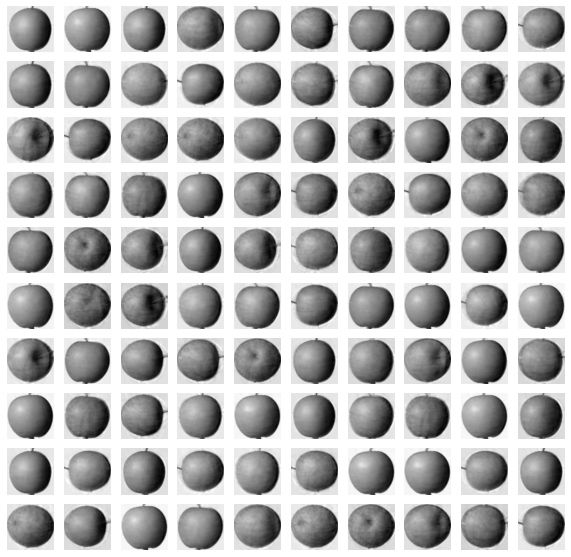

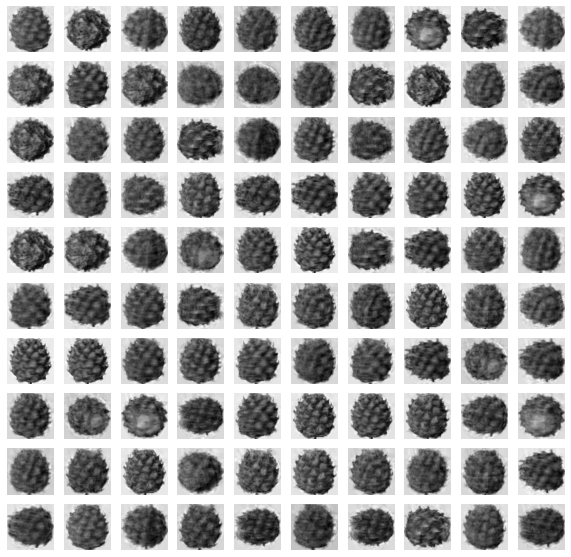

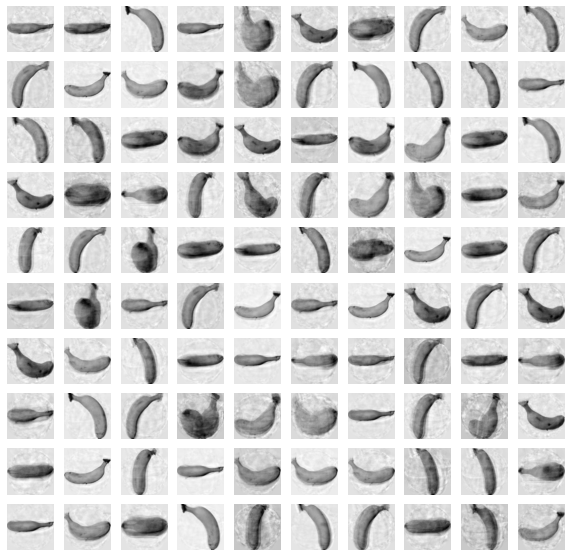

In [ ]:
# 복원된 데이터 100개씩 나누어 출력
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start : start + 100])
  print("\n")

#### 설명된 분산
- 원본 데이터를 얼마나 잘 나타내는지 기록한 값

In [ ]:
# 분산 비율
np.sum(pca.explained_variance_ratio_)

0.9214875957703612

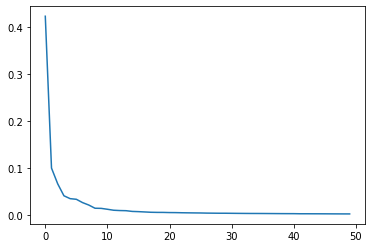

In [ ]:
# 처음 10개의 주성분이 대부분의 분산을 표현
plt.plot(pca.explained_variance_ratio_)
plt.show()

#### 다른 알고리즘과 함께 사용하기
 - 원본 데이터와 축소한 데이터를 지도학습에 적용해보고 차이 확인

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
# 원본 데이터로 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
np.mean(scores['test_score']), np.mean(scores['fit_time'])

(0.9966666666666667, 1.4878403186798095)

In [ ]:
# pca로 축소한 데이터로 교차검증(데이터 차원을 축소하면 저장 공간뿐만 아니라 훈련속도도 높일 수 있다.)
scores = cross_validate(lr, fruits_pca, target)
np.mean(scores['test_score']), np.mean(scores['fit_time'])

(1.0, 0.059746074676513675)

In [ ]:
# n_components 매개변수에 주성분의 개수 대신 원하는 설명된 분산의 비율을 입력 가능
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)
pca.n_components_ # 2개의 주성분을 가짐

2

In [ ]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
np.mean(scores['test_score']), np.mean(scores['fit_time'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


(0.9933333333333334, 0.10476431846618653)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state = 42)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

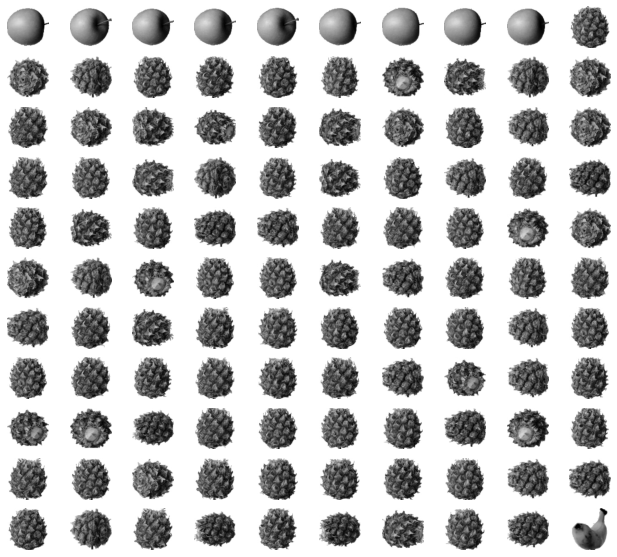

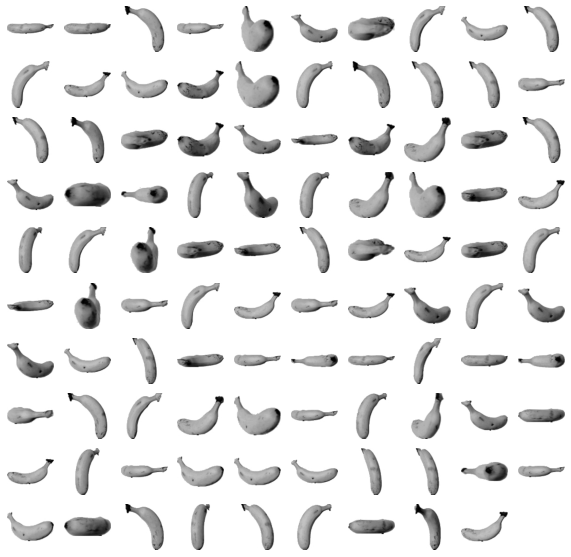

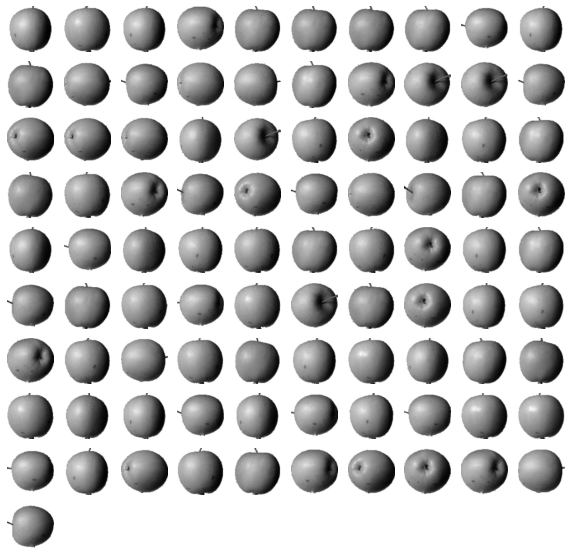

In [ ]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

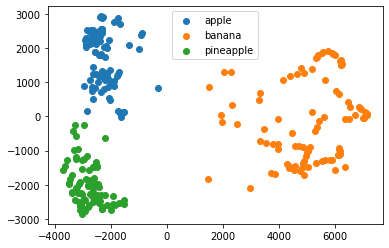

In [ ]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()